In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
import pandas as pd
import seaborn as sns
from statsmodels import api as sm
from matplotlib import pyplot as plt
from pandas.plotting import register_matplotlib_converters
import os
import numpy as np
from sklearn.preprocessing import PowerTransformer
from sklearn.decomposition import PCA
import math

In [3]:
df = pd.read_csv( os.path.join('csv_label', 'learning_data_10.csv') )
df=df[df['day']<=1]
df

,original,label,time,day
0,53.4,0,15,0
1,52.8,0,15,0
2,52.8,0,15,0
3,53.2,0,15,0
4,53.6,0,15,0
...,...,...,...,...
719465,46.0,0,21,1
719466,46.0,0,21,1
719467,45.9,0,21,1
719468,45.9,0,21,1


In [4]:
period=3
for i in set(df['day']):
    df.loc[df['day']==i, 'trend']=df.loc[df['day']==i, 'original'].rolling(window=period+1, min_periods=1).mean()
df=df.dropna().reset_index(drop=True)
df

,original,label,time,day,trend
0,53.4,0,15,0,53.400
1,52.8,0,15,0,53.100
2,52.8,0,15,0,53.000
3,53.2,0,15,0,53.050
4,53.6,0,15,0,53.100
...,...,...,...,...,...
719465,46.0,0,21,1,45.925
719466,46.0,0,21,1,46.000
719467,45.9,0,21,1,46.000
719468,45.9,0,21,1,45.950


In [5]:
day=(df['time']>=6) & (df['time']<22)
night=~day
df.loc[night, 'night']=1
df.loc[day, 'night']=0
df

,original,label,time,day,trend,night
0,53.4,0,15,0,53.400,0.0
1,52.8,0,15,0,53.100,0.0
2,52.8,0,15,0,53.000,0.0
3,53.2,0,15,0,53.050,0.0
4,53.6,0,15,0,53.100,0.0
...,...,...,...,...,...,...
719465,46.0,0,21,1,45.925,0.0
719466,46.0,0,21,1,46.000,0.0
719467,45.9,0,21,1,46.000,0.0
719468,45.9,0,21,1,45.950,0.0


In [6]:
norm_list=[]
for i in range(100):
    norm_list.append(df.loc[(df['night']==0)&(df['label']==0), ['original']].sample(n=1000).describe().T)
norm_df=pd.concat(norm_list)

display(norm_df.mean(), norm_df.describe())

count    1000.000000
mean       53.227015
std         6.326085
min        42.708000
25%        47.926500
50%        52.549500
75%        57.952750
max        74.466000
dtype: float64

,count,mean,std,min,25%,50%,75%,max
count,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000
mean,1000.0,53.227015,6.326085,42.708000,47.926500,52.549500,57.95275,74.466000
std,0.0,0.226270,0.114553,0.285572,0.245228,0.310221,0.36737,2.384259
min,1000.0,52.586700,6.016386,41.200000,47.300000,51.800000,56.92500,69.700000
25%,1000.0,53.058125,6.250188,42.600000,47.700000,52.300000,57.70000,72.800000
50%,1000.0,53.210300,6.323391,42.700000,47.900000,52.500000,57.92500,74.000000
75%,1000.0,53.378200,6.401858,42.900000,48.100000,52.800000,58.20000,75.850000
max,1000.0,53.892100,6.639899,43.200000,48.500000,53.700000,59.00000,85.600000


In [7]:
anorm_list=[]
for i in range(100):
    anorm_list.append(df.loc[(df['night']==0)&(df['label']==1), ['original']].sample(n=1000).describe().T)
anorm_df=pd.concat(anorm_list)
display(anorm_df.mean(), anorm_df.describe())

count    1000.000000
mean       57.914429
std         6.356184
min        43.407000
25%        54.046750
50%        58.378000
75%        62.634250
max        76.867000
dtype: float64

,count,mean,std,min,25%,50%,75%,max
count,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,1000.0,57.914429,6.356184,43.407000,54.046750,58.378000,62.634250,76.867000
std,0.0,0.200010,0.131647,0.119134,0.257652,0.326701,0.231395,2.581365
min,1000.0,57.482900,5.996851,43.200000,53.300000,57.550000,62.100000,70.700000
25%,1000.0,57.756475,6.260660,43.300000,53.900000,58.200000,62.500000,74.900000
50%,1000.0,57.921400,6.356575,43.400000,54.075000,58.350000,62.600000,76.800000
75%,1000.0,58.063425,6.453833,43.500000,54.200000,58.600000,62.800000,78.400000
max,1000.0,58.420300,6.645171,43.600000,54.600000,59.200000,63.200000,81.300000


In [8]:
norm_list=[]
for i in range(100):
    norm_list.append(df.loc[(df['night']==0)&(df['label']==0), ['original']].sample(n=1000).round().mode())
norm_df=pd.concat(norm_list)
norm_df.describe()

,original
count,107.000000
mean,49.747664
std,3.215803
min,44.000000
25%,46.500000
50%,50.000000
75%,52.000000
max,56.000000


In [9]:
anorm_list=[]
for i in range(100):
    anorm_list.append(df.loc[(df['night']==0)&(df['label']==1), ['original']].sample(n=1000).round().mode())
anorm_df=pd.concat(anorm_list)
anorm_df.describe()

,original
count,109.000000
mean,59.357798
std,2.743757
min,55.000000
25%,56.000000
50%,60.000000
75%,62.000000
max,62.000000


In [10]:
df.loc[(df['night']==0)&(df['label']==0), ['original']].describe()

,original
count,554856.000000
mean,53.247880
std,6.333561
min,41.100000
25%,47.900000
50%,52.600000
75%,58.000000
max,87.300000


In [11]:
df.loc[(df['night']==0)&(df['label']==1), ['original']].describe()

,original
count,20614.000000
mean,57.918259
std,6.340249
min,43.200000
25%,54.100000
50%,58.300000
75%,62.600000
max,81.300000


In [19]:
anorm_list=[]
for i in range(100):
    anorm_list.append(df.loc[(df['night']==0)&(df['label']==1), ['original']].sample(n=1000).kurt())
anorm_df=pd.concat(anorm_list)
anorm_df.describe()

count    100.000000
mean      -0.360857
std        0.097442
min       -0.530166
25%       -0.438632
50%       -0.375096
75%       -0.291702
max       -0.073519
dtype: float64

In [18]:
norm_list=[]
for i in range(100):
    norm_list.append(df.loc[(df['night']==0)&(df['label']==0), ['original']].sample(n=1000).kurt())
norm_df=pd.concat(norm_list)
norm_df.describe()

count    100.000000
mean      -0.589688
std        0.157910
min       -0.875802
25%       -0.698590
50%       -0.622441
75%       -0.505422
max        0.051506
dtype: float64

In [20]:
anorm_list=[]
for i in range(100):
    anorm_list.append(df.loc[(df['night']==0)&(df['label']==1), ['original']].sample(n=1000).skew())
anorm_df=pd.concat(anorm_list)
anorm_df.describe()

count    100.000000
mean      -0.287852
std        0.062541
min       -0.464863
25%       -0.324823
50%       -0.290281
75%       -0.241099
max       -0.160580
dtype: float64

In [21]:
norm_list=[]
for i in range(100):
    norm_list.append(df.loc[(df['night']==0)&(df['label']==0), ['original']].sample(n=1000).skew())
norm_df=pd.concat(norm_list)
norm_df.describe()

count    100.000000
mean       0.406595
std        0.048016
min        0.287894
25%        0.372255
50%        0.404158
75%        0.438527
max        0.504322
dtype: float64

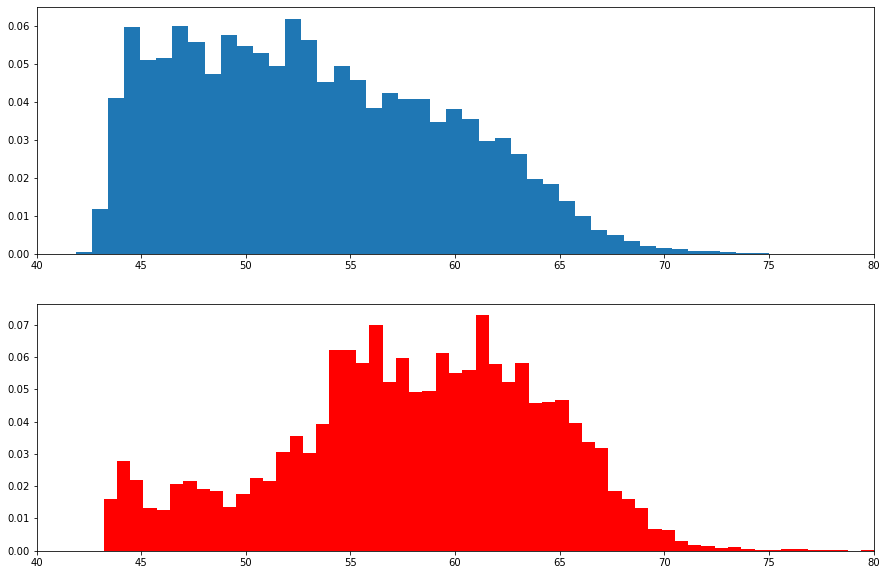

In [34]:
fig= plt.figure(figsize=(15, 10))
ax=fig.add_subplot(211)
ax.hist(df.loc[(df['night']==0)&(df['label']==0), 'original'], density=True, bins=60)
plt.xlim(40, 80)
ax2=fig.add_subplot(212)
ax2.hist(df.loc[(df['night']==0)&(df['label']==1), 'original'],color="red", density=True, bins=60)
plt.xlim(40, 80)
plt.show()

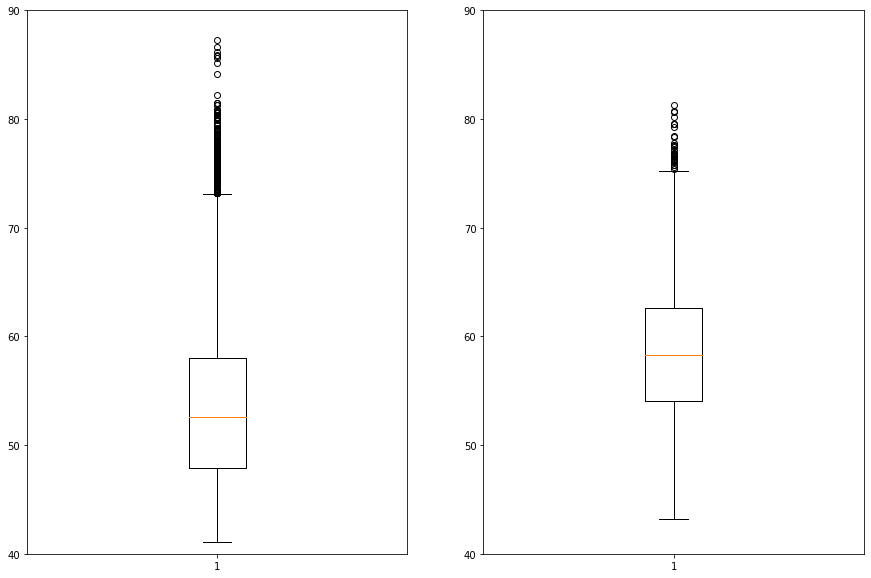

In [33]:
fig= plt.figure(figsize=(15, 10))
ax=fig.add_subplot(121)
ax.boxplot(df.loc[(df['night']==0)&(df['label']==0), 'original'])
plt.ylim(40, 90)
ax2=fig.add_subplot(122)
ax2.boxplot(df.loc[(df['night']==0)&(df['label']==1), 'original'])
plt.ylim(40, 90)
plt.show()

C:\Users\Arakawa\anaconda3\lib\site-packages\numpy\lib\histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


IndexError: index 19 is out of bounds for axis 0 with size 19

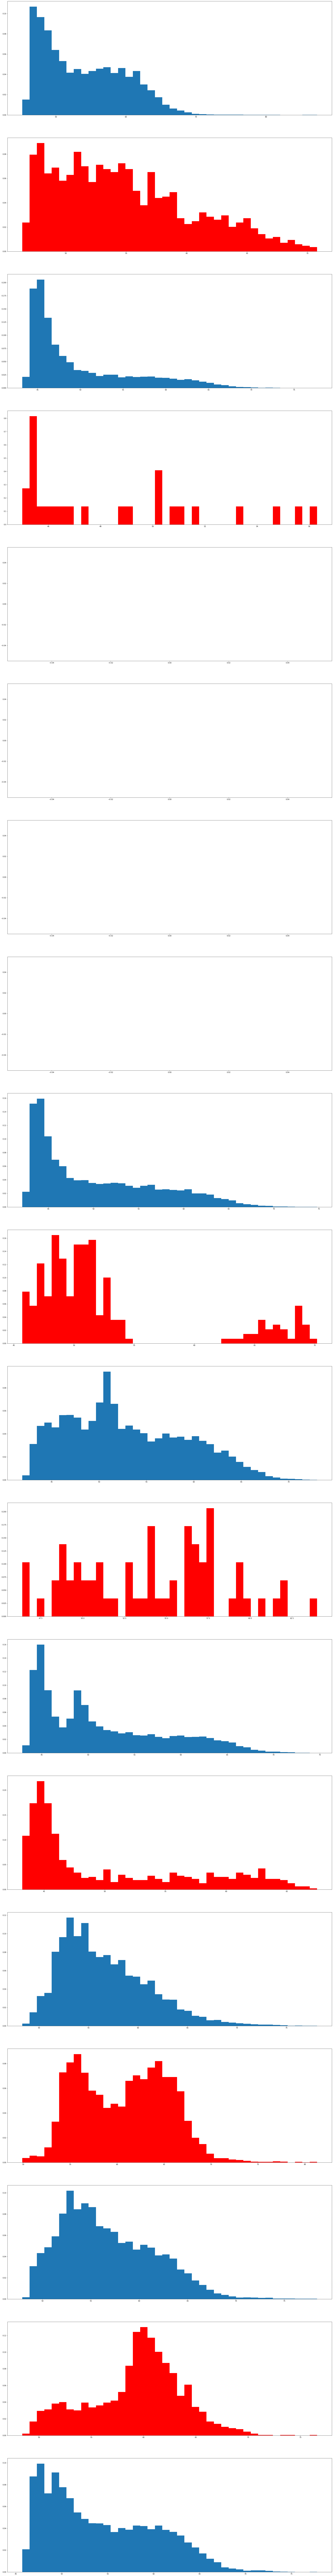

In [22]:
data_unit=18000*2
num_ax=math.floor(len(df)/data_unit)
fig, ax=plt.subplots(num_ax, 1, figsize=(35, 15*num_ax))
for i in range(0, num_ax, 2):
    start=i*data_unit
    stop=(i+1)*data_unit
    data=df[start:stop]

    ax[i].hist(data.loc[(data['night']==0)&(data['label']==0), 'original'], density=True, bins=40)

    ax[i+1].hist(data.loc[(data['night']==0)&(data['label']==1), 'original'],color="red", density=True, bins=40)
plt.show()

(array([4.52890520e-04, 2.44175586e-02, 4.36032177e-02, 5.11935276e-02,
        5.30294241e-02, 5.46334677e-02, 5.60975884e-02, 5.51181282e-02,
        4.75589122e-02, 4.30104043e-02, 4.10933931e-02, 3.71600051e-02,
        3.07005696e-02, 2.13027533e-02, 1.24071724e-02, 6.29585418e-03,
        2.68895297e-03, 1.42423929e-03, 7.61802411e-04, 3.84618964e-04,
        1.87915768e-04, 7.23272919e-05, 3.10939760e-05, 1.41950760e-05,
        2.02786800e-06, 4.73169200e-06, 5.40764800e-06, 2.70382400e-06,
        2.02786800e-06, 6.75956000e-07]),
 array([41.1       , 42.81333333, 44.52666667, 46.24      , 47.95333333,
        49.66666667, 51.38      , 53.09333333, 54.80666667, 56.52      ,
        58.23333333, 59.94666667, 61.66      , 63.37333333, 65.08666667,
        66.8       , 68.51333333, 70.22666667, 71.94      , 73.65333333,
        75.36666667, 77.08      , 78.79333333, 80.50666667, 82.22      ,
        83.93333333, 85.64666667, 87.36      , 89.07333333, 90.78666667,
        92.5    

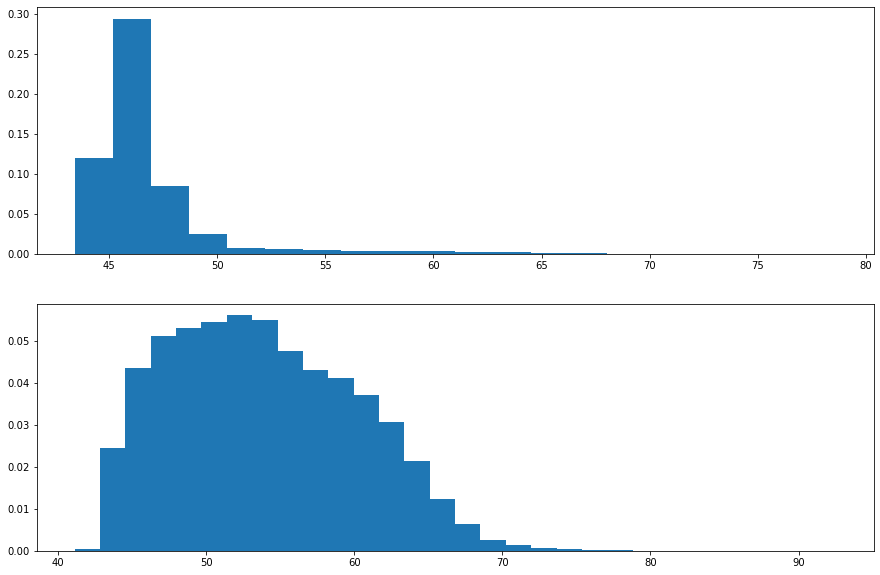

In [7]:
fig= plt.figure(figsize=(15, 10))
ax=fig.add_subplot(211)
ax.hist(df.loc[night, 'original'], density=True, bins=20)
ax2=fig.add_subplot(212)
ax2.hist(df.loc[day, 'original'], density=True, bins=30)

In [8]:
df['log']=df_log

In [9]:
tr=pd.DataFrame(df[df['day']==0]['original'])
te=pd.DataFrame(df[df['day']!=0]['original'])

In [10]:
pt = PowerTransformer(method='box-cox')
pt.fit(tr)

PowerTransformer(method='box-cox')

In [11]:
tr_bc=pt.transform(tr)
te_bc=pt.transform(te)

In [12]:
df.loc[df['day']==0, 'b_c']=tr_bc
df.loc[df['day']!=0, 'b_c']=te_bc

(array([2.82340001e-05, 0.00000000e+00, 4.23510002e-05, 2.39989001e-04,
        1.58110401e-03, 7.56671203e-03, 2.13449041e-02, 6.38653083e-02,
        8.86265264e-02, 1.63898371e-01, 4.03619149e-01, 7.72764583e-01,
        7.20334045e-01, 3.68496053e-01, 2.27057829e-01, 2.15510123e-01,
        2.33029320e-01, 1.78523583e-01, 1.97313310e-01, 1.95153409e-01,
        1.93840528e-01, 2.49165051e-01, 2.31871726e-01, 2.36036241e-01,
        2.48388616e-01, 3.10150491e-01, 3.63823326e-01, 3.11533957e-01,
        8.94876634e-02, 5.03976902e-03]),
 array([-2.85527406, -2.6912948 , -2.52731554, -2.36333628, -2.19935703,
        -2.03537777, -1.87139851, -1.70741925, -1.54344   , -1.37946074,
        -1.21548148, -1.05150222, -0.88752296, -0.72354371, -0.55956445,
        -0.39558519, -0.23160593, -0.06762667,  0.09635258,  0.26033184,
         0.4243111 ,  0.58829036,  0.75226961,  0.91624887,  1.08022813,
         1.24420739,  1.40818665,  1.5721659 ,  1.73614516,  1.90012442,
         2.06410

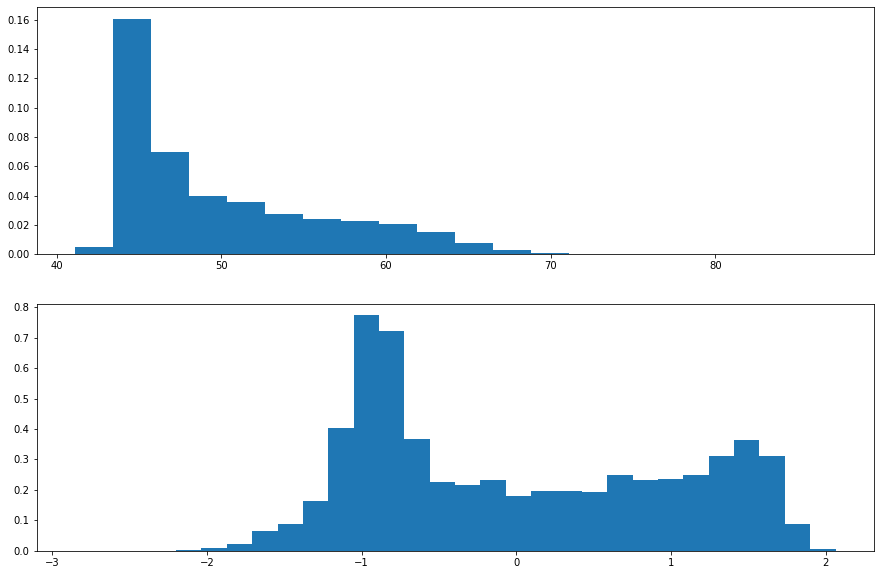

In [13]:
fig= plt.figure(figsize=(15, 10))
ax=fig.add_subplot(211)
ax.hist(df.loc[df['day']==0, 'original'], density=True, bins=20)
ax2=fig.add_subplot(212)
ax2.hist(df.loc[df['day']==0, 'b_c'], density=True, bins=30)

In [39]:
def make_data(x, str,w):
    x=pd.DataFrame(x)
    window=w
    for i in range(1, window):
        column=f'{str}_lag{i}'
        x[column]=x[str].shift(i)
    
#     for i in range(-1, -window, -1):
#         column=f'{str}_lag{i}'
#         x[column]=x[str].shift(i)   
    return x

lag=[] 
# lag.append(df['original'])
window=20
for str in ['original']:
    lag.append(make_data(df[str], str, window))

# lag.append(df['trend'])
# lag.append(df['seasonal'])
# lag.append(df['resid'])
lag.append(df['night'])
lag.append(df['day'])
lag.append(df['label'])
df_add_lag=pd.concat(lag, axis=1)
df=df_add_lag.dropna().reset_index(drop=True)
df

,original,original_lag1,original_lag2,original_lag3,original_lag4,original_lag5,original_lag6,original_lag7,original_lag8,original_lag9,...,original_lag13,original_lag14,original_lag15,original_lag16,original_lag17,original_lag18,original_lag19,night,day,label
0,54.0,53.9,54.0,53.8,54.0,54.3,54.5,54.4,54.7,55.2,...,54.9,54.9,55.0,55.7,55.8,55.6,55.7,53.898228,0,0
1,53.9,54.0,53.9,54.0,53.8,54.0,54.3,54.5,54.4,54.7,...,54.9,54.9,54.9,55.0,55.7,55.8,55.6,53.898228,0,0
2,54.0,53.9,54.0,53.9,54.0,53.8,54.0,54.3,54.5,54.4,...,55.0,54.9,54.9,54.9,55.0,55.7,55.8,53.898228,0,0
3,54.0,54.0,53.9,54.0,53.9,54.0,53.8,54.0,54.3,54.5,...,55.0,55.0,54.9,54.9,54.9,55.0,55.7,53.898228,0,0
4,53.8,54.0,54.0,53.9,54.0,53.9,54.0,53.8,54.0,54.3,...,55.2,55.0,55.0,54.9,54.9,54.9,55.0,53.898228,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1151422,53.6,54.3,55.1,55.2,55.6,56.2,56.4,56.8,56.4,56.0,...,57.3,57.5,57.3,57.5,57.7,57.1,56.2,53.898228,2,0
1151423,53.8,53.6,54.3,55.1,55.2,55.6,56.2,56.4,56.8,56.4,...,56.9,57.3,57.5,57.3,57.5,57.7,57.1,53.898228,2,0
1151424,53.1,53.8,53.6,54.3,55.1,55.2,55.6,56.2,56.4,56.8,...,56.2,56.9,57.3,57.5,57.3,57.5,57.7,53.898228,2,0
1151425,53.0,53.1,53.8,53.6,54.3,55.1,55.2,55.6,56.2,56.4,...,56.1,56.2,56.9,57.3,57.5,57.3,57.5,53.898228,2,0


In [40]:
data_tmp=pd.DataFrame({'n_d':df['night'], 'target':df['original']})
target_mean=data_tmp.groupby('n_d')['target'].mean()
df['night']=df['night'].map(target_mean)
df

,original,original_lag1,original_lag2,original_lag3,original_lag4,original_lag5,original_lag6,original_lag7,original_lag8,original_lag9,...,original_lag13,original_lag14,original_lag15,original_lag16,original_lag17,original_lag18,original_lag19,night,day,label
0,54.0,53.9,54.0,53.8,54.0,54.3,54.5,54.4,54.7,55.2,...,54.9,54.9,55.0,55.7,55.8,55.6,55.7,53.898208,0,0
1,53.9,54.0,53.9,54.0,53.8,54.0,54.3,54.5,54.4,54.7,...,54.9,54.9,54.9,55.0,55.7,55.8,55.6,53.898208,0,0
2,54.0,53.9,54.0,53.9,54.0,53.8,54.0,54.3,54.5,54.4,...,55.0,54.9,54.9,54.9,55.0,55.7,55.8,53.898208,0,0
3,54.0,54.0,53.9,54.0,53.9,54.0,53.8,54.0,54.3,54.5,...,55.0,55.0,54.9,54.9,54.9,55.0,55.7,53.898208,0,0
4,53.8,54.0,54.0,53.9,54.0,53.9,54.0,53.8,54.0,54.3,...,55.2,55.0,55.0,54.9,54.9,54.9,55.0,53.898208,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1151422,53.6,54.3,55.1,55.2,55.6,56.2,56.4,56.8,56.4,56.0,...,57.3,57.5,57.3,57.5,57.7,57.1,56.2,53.898208,2,0
1151423,53.8,53.6,54.3,55.1,55.2,55.6,56.2,56.4,56.8,56.4,...,56.9,57.3,57.5,57.3,57.5,57.7,57.1,53.898208,2,0
1151424,53.1,53.8,53.6,54.3,55.1,55.2,55.6,56.2,56.4,56.8,...,56.2,56.9,57.3,57.5,57.3,57.5,57.7,53.898208,2,0
1151425,53.0,53.1,53.8,53.6,54.3,55.1,55.2,55.6,56.2,56.4,...,56.1,56.2,56.9,57.3,57.5,57.3,57.5,53.898208,2,0


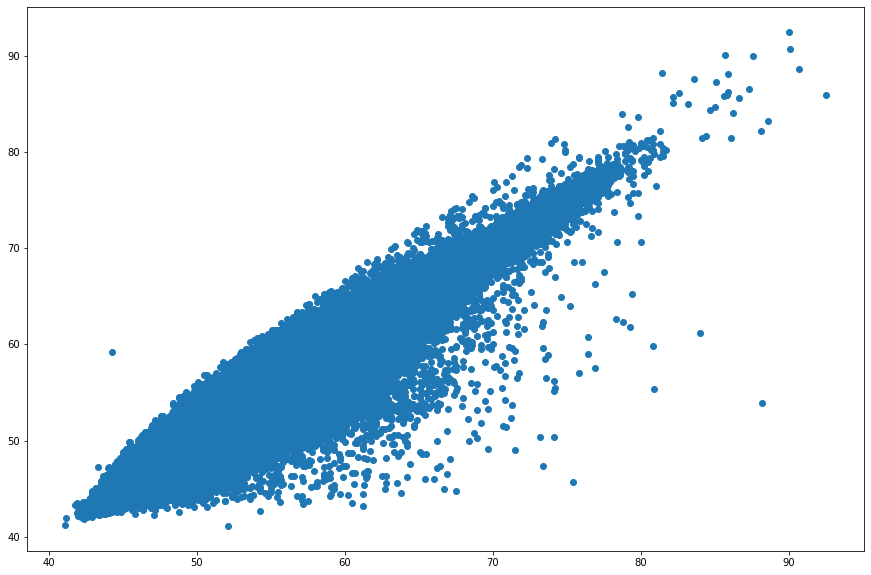

In [41]:
fig= plt.figure(figsize=(15, 10))
ax=fig.add_subplot(111)
ax.scatter(df['original'],df['original_lag1'] )

In [42]:
# pca=PCA(n_components=5)
# pca.fit(df.loc[df['day']==0, df.columns[:-2]])

# train=pca.transform(df[(df['label']==0)&(df['day']==0)][df.columns[:-2]])
# test=pca.transform(df[df['day']!=0][df.columns[:-2]])

In [43]:
train=df[(df['label']==0)&(df['day']==0)][df.columns[:-3]].values
test=df[(df['day']!=0)][df.columns[:-3]].values
train

array([[54. , 53.9, 54. , ..., 55.8, 55.6, 55.7],
       [53.9, 54. , 53.9, ..., 55.7, 55.8, 55.6],
       [54. , 53.9, 54. , ..., 55. , 55.7, 55.8],
       ...,
       [58.2, 58.1, 57.7, ..., 54.7, 54. , 53.7],
       [58.8, 58.2, 58.1, ..., 54.9, 54.7, 54. ],
       [59.2, 58.8, 58.2, ..., 54.5, 54.9, 54.7]])

In [44]:
train_cov=np.cov(train, rowvar=False)
train_cov

array([[37.93808967, 37.70165662, 37.44858174, 37.21117568, 36.96642302,
        36.69229175, 36.38442708, 36.05086538, 35.68914301, 35.29523402,
        34.87299485, 34.42667314, 33.95816292, 33.47387426, 32.97652692,
        32.46825855, 31.94482606, 31.41031963, 30.87016387, 30.32373739],
       [37.70165662, 37.93781721, 37.70144686, 37.44895115, 37.21212406,
        36.96679173, 36.6926235 , 36.38456499, 36.05151659, 35.69017575,
        35.29571162, 34.87326758, 34.42748063, 33.95946363, 33.47550727,
        32.97819829, 32.46961827, 31.94574071, 31.41134662, 30.87127402],
       [37.44858174, 37.70144686, 37.93734872, 37.70182788, 37.4499287 ,
        37.21265079, 36.96731079, 36.69300373, 36.38530313, 36.05231897,
        35.69044054, 35.29555363, 34.87379877, 34.42873024, 33.96138104,
        33.47764691, 32.98020673, 32.47101877, 31.94735505, 31.41294063],
       [37.21117568, 37.44895115, 37.70182788, 37.93710021, 37.70239038,
        37.44993225, 37.21269544, 36.96700299, 3

In [45]:
nk = 1
# neigh = NearestNeighbors(n_neighbors=nk, metric='mahalanobis',
#                          metric_params={'V': train_cov}, algorithm='ball_tree')
neigh = NearestNeighbors(n_neighbors=nk, metric='euclidean')
neigh.fit(train)
d = neigh.kneighbors(test)[0]

d = np.mean(d, axis=1)
mx = np.max(d)
d = d / mx

KeyboardInterrupt: 

In [36]:
test_for_plot=df[(df['day']!=0)]['original'].values[window-1:]
test_for_plot

array([44.6, 44.3, 44.1, ..., 53.1, 53. , 51.6])

In [37]:
label=df[(df['day']!=0)][df.columns[-1]].values[window-1:]*100
label_index=range(len(label))

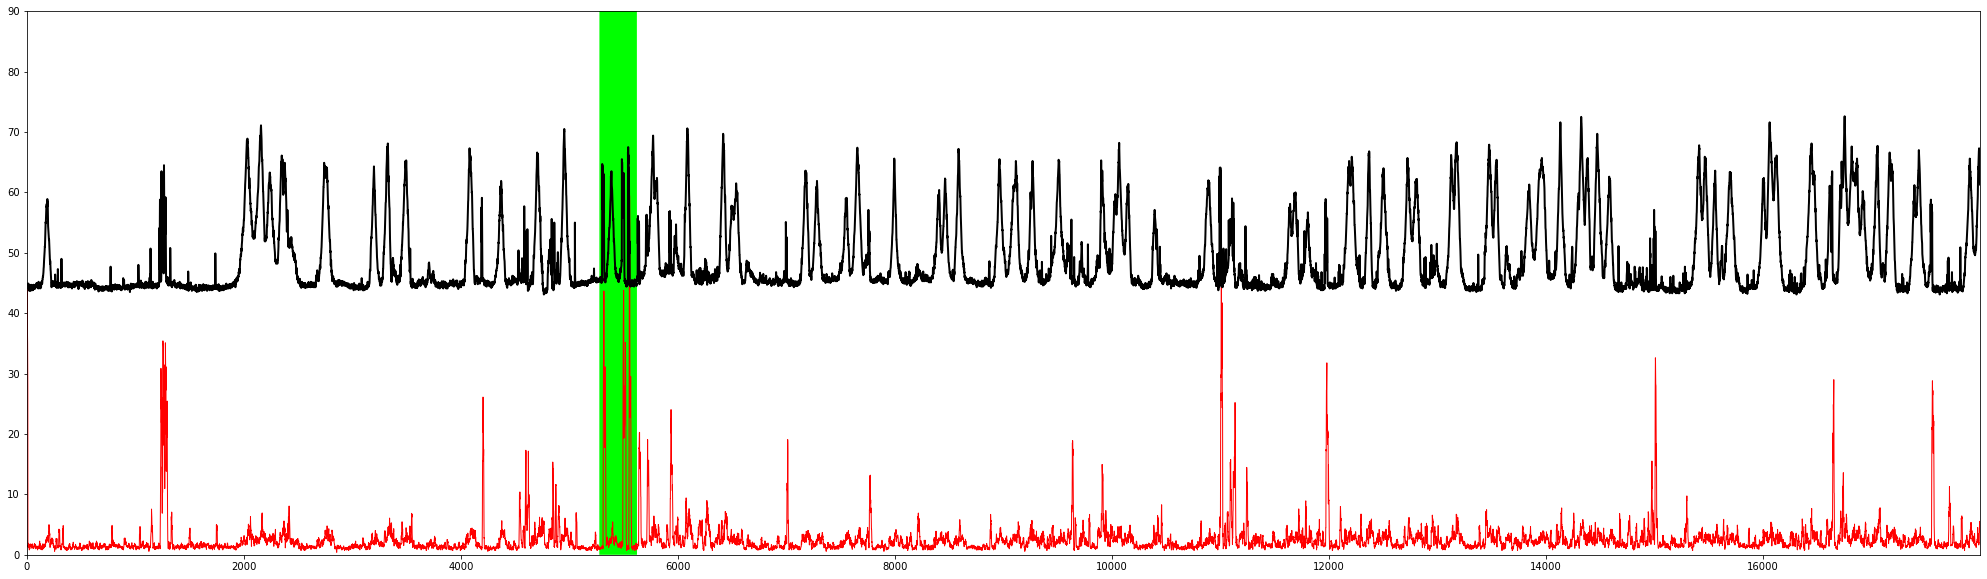

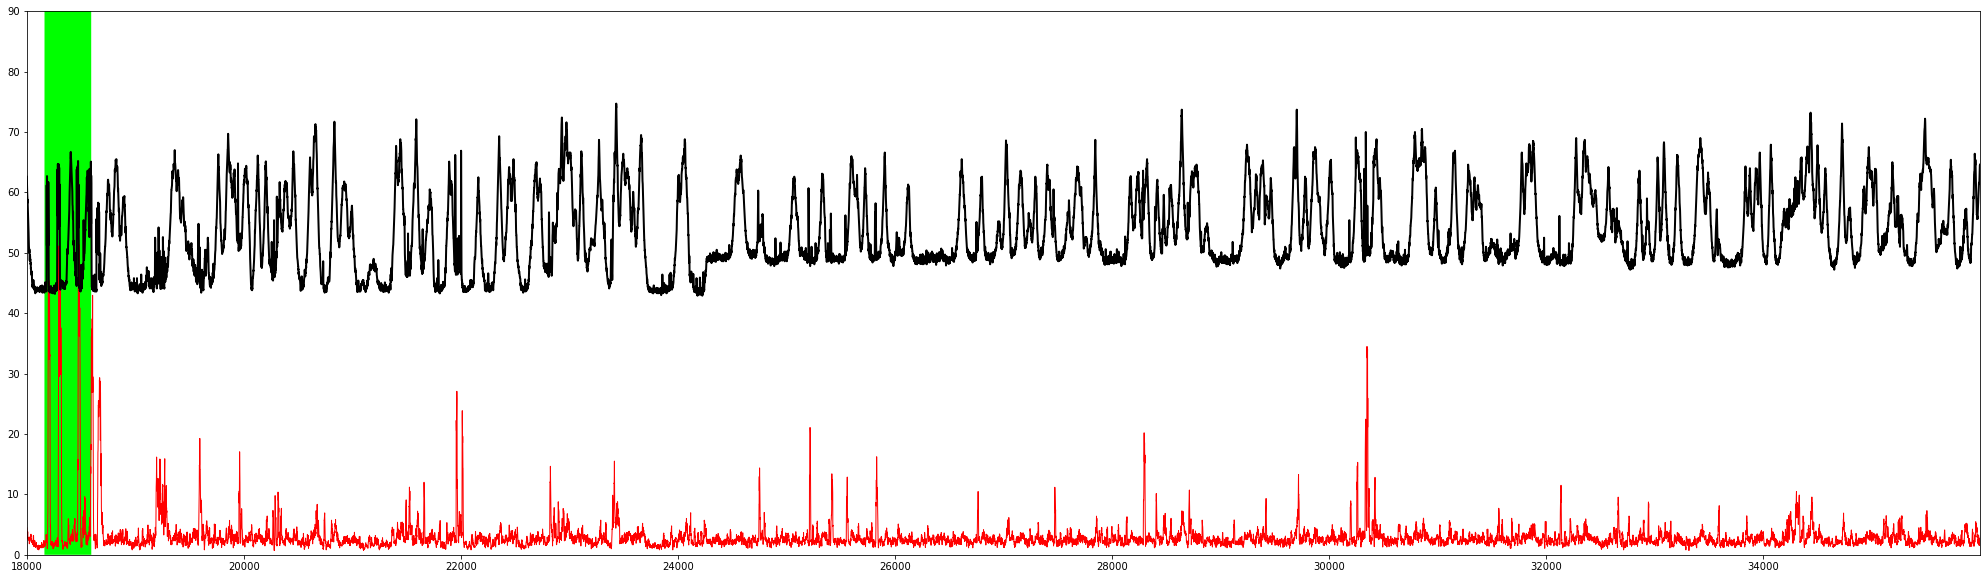

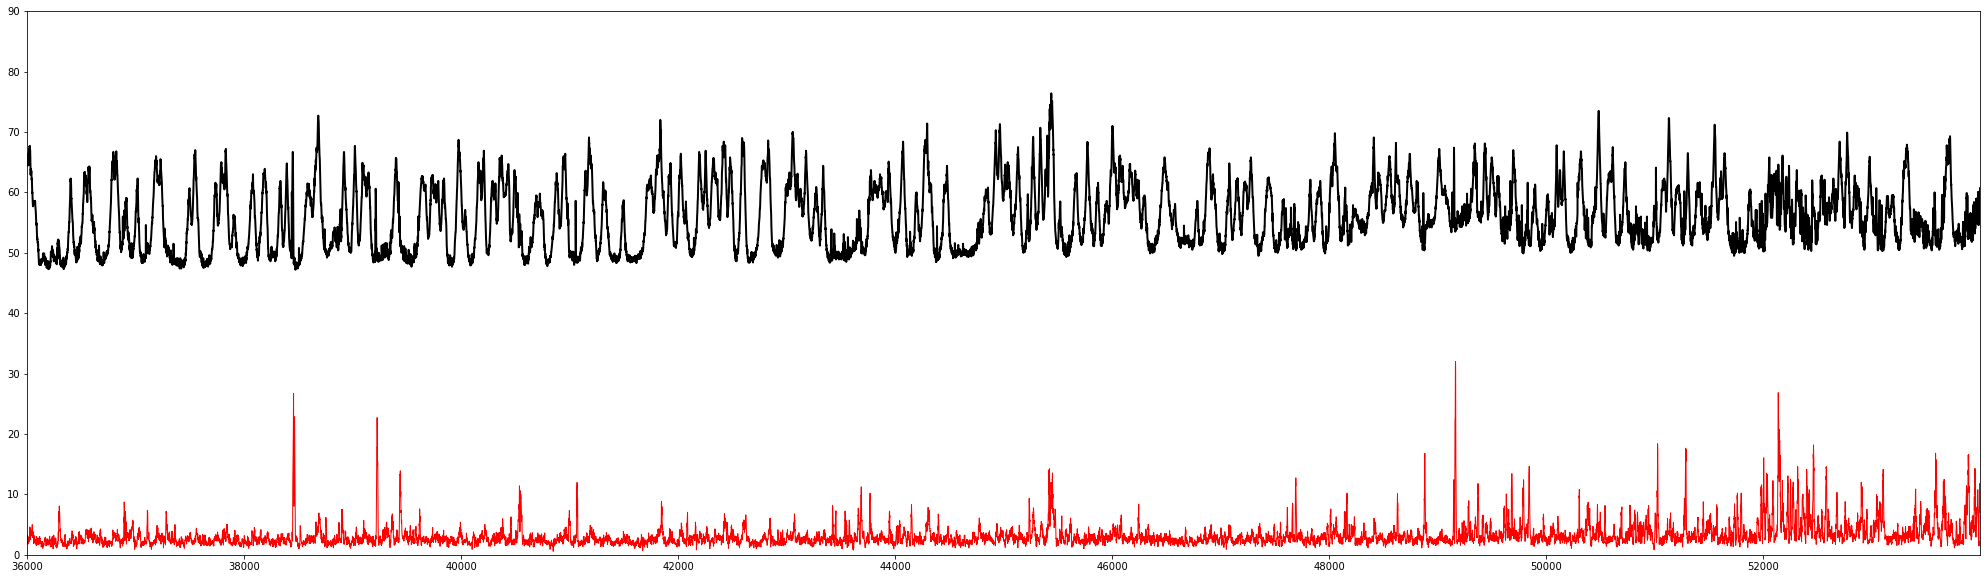

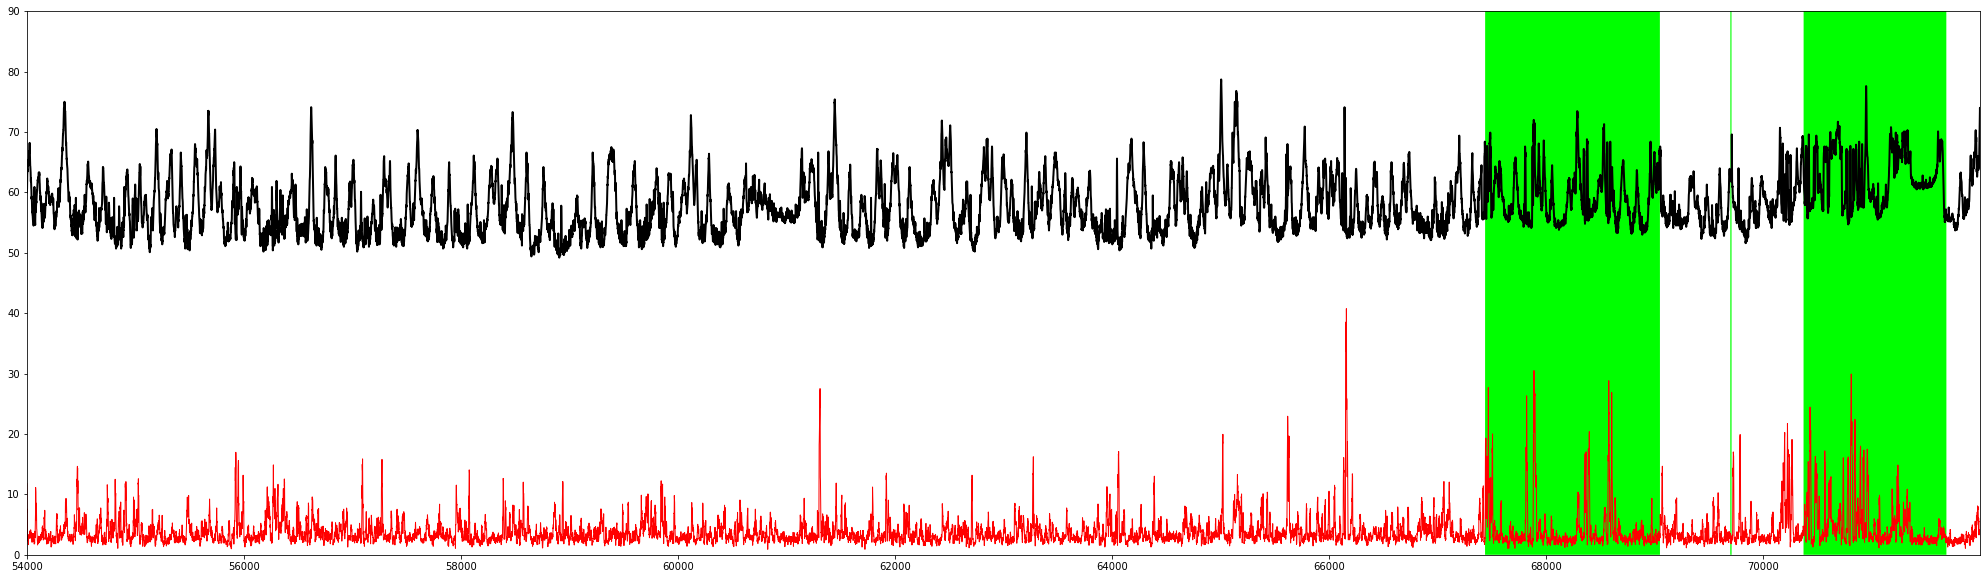

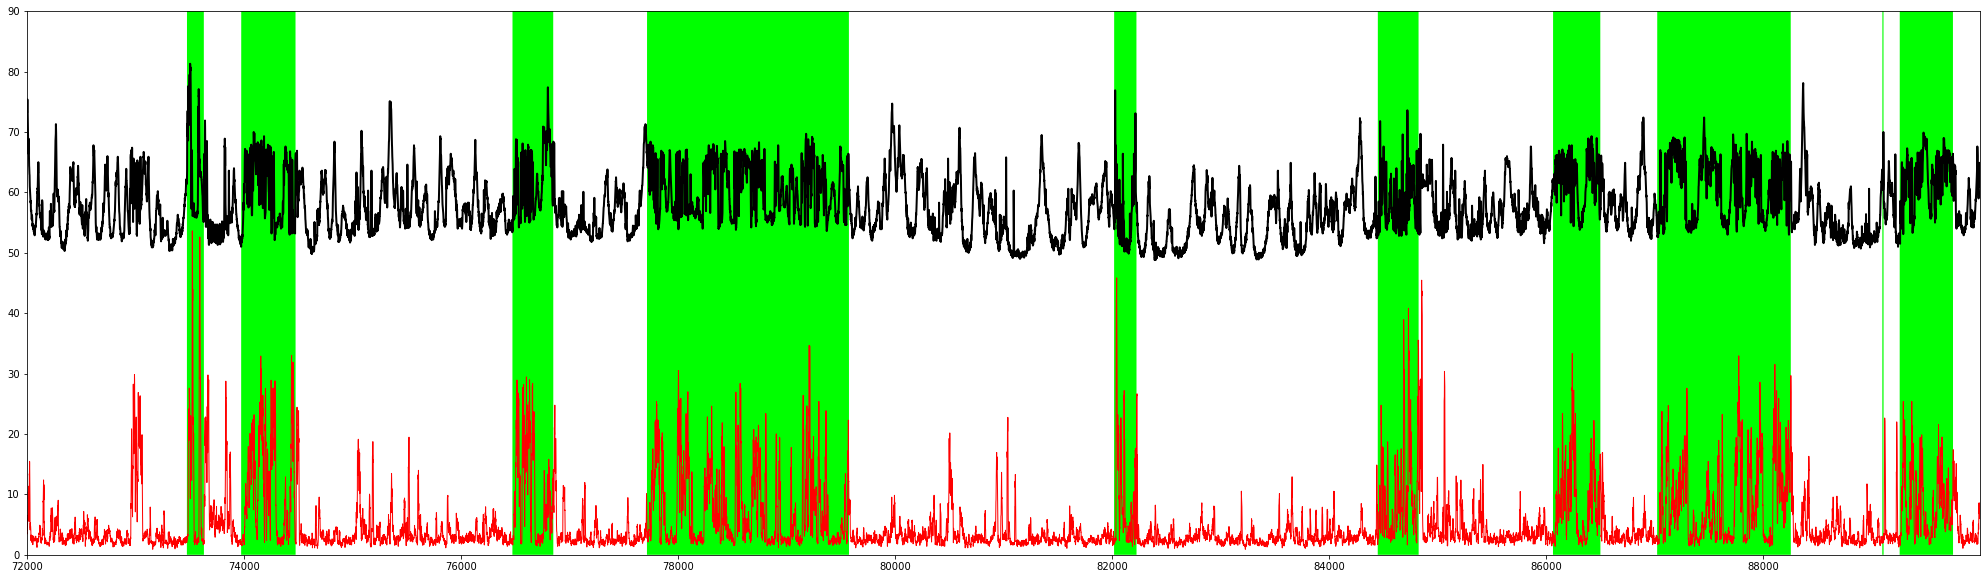

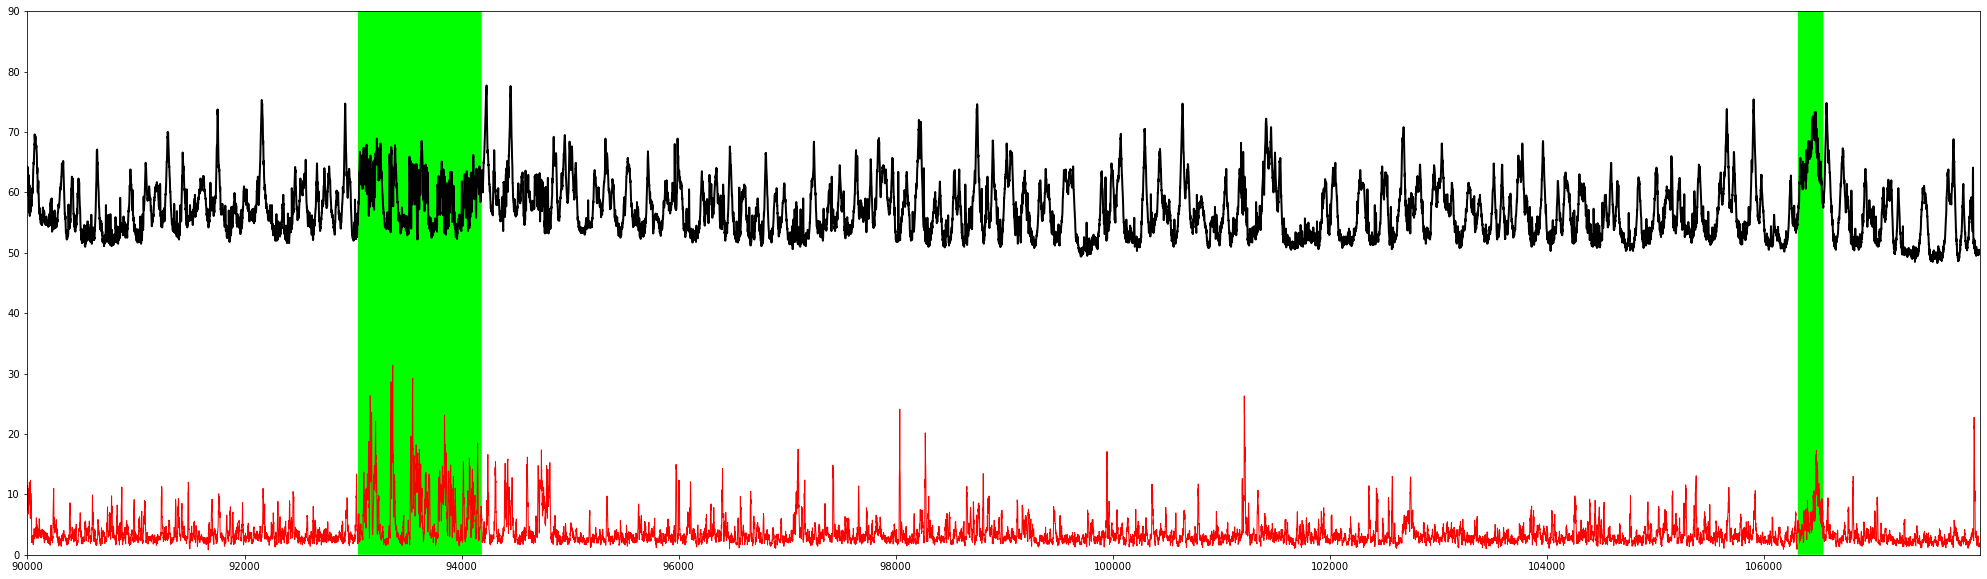

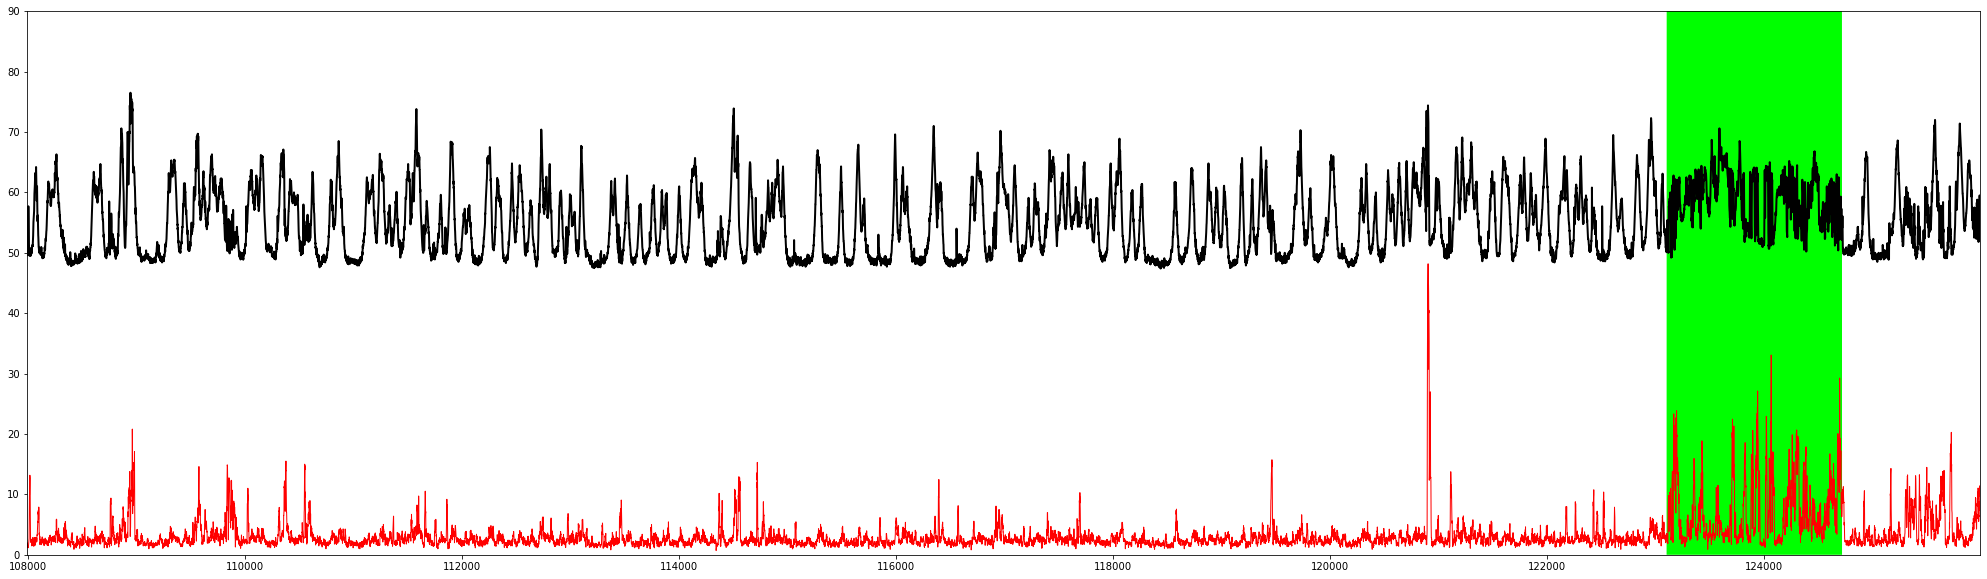

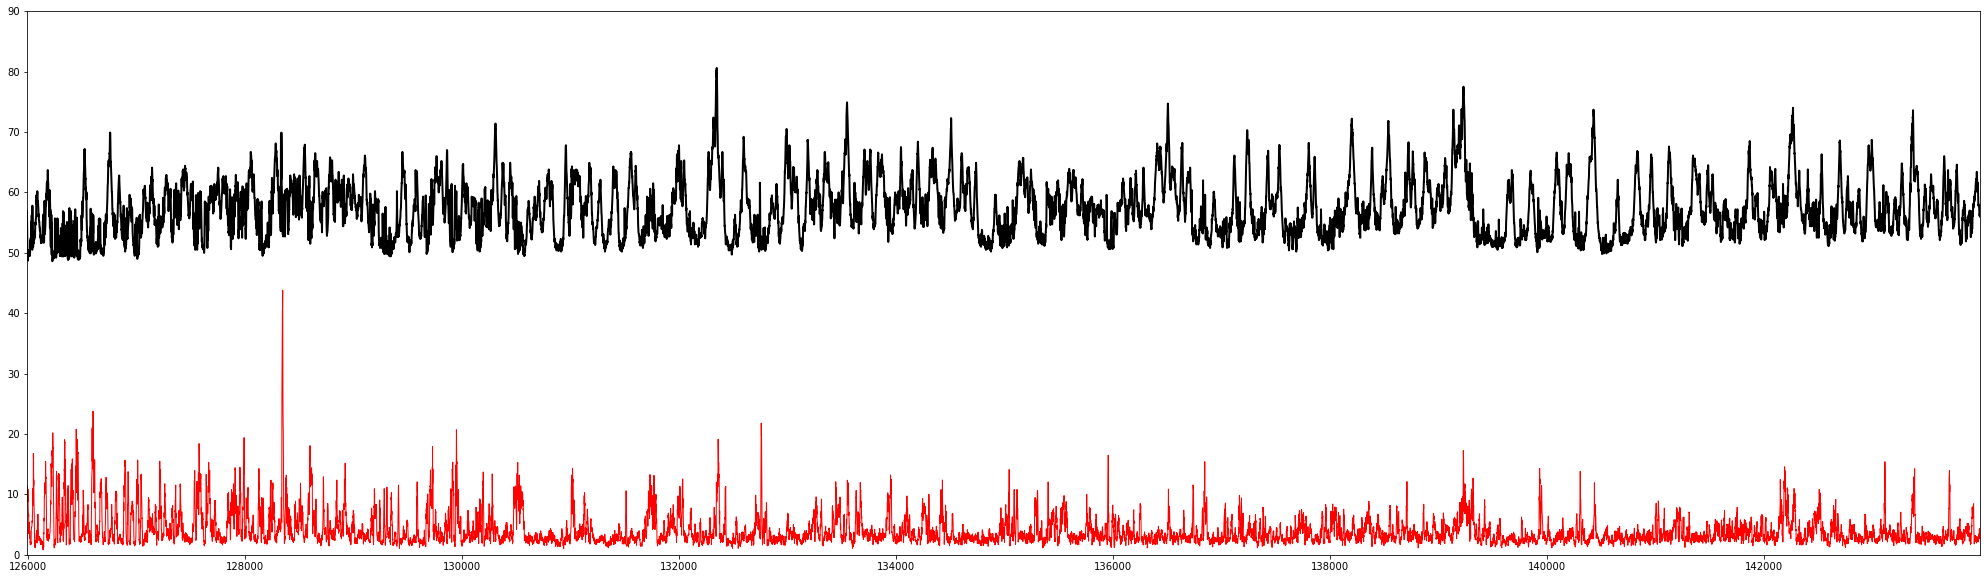

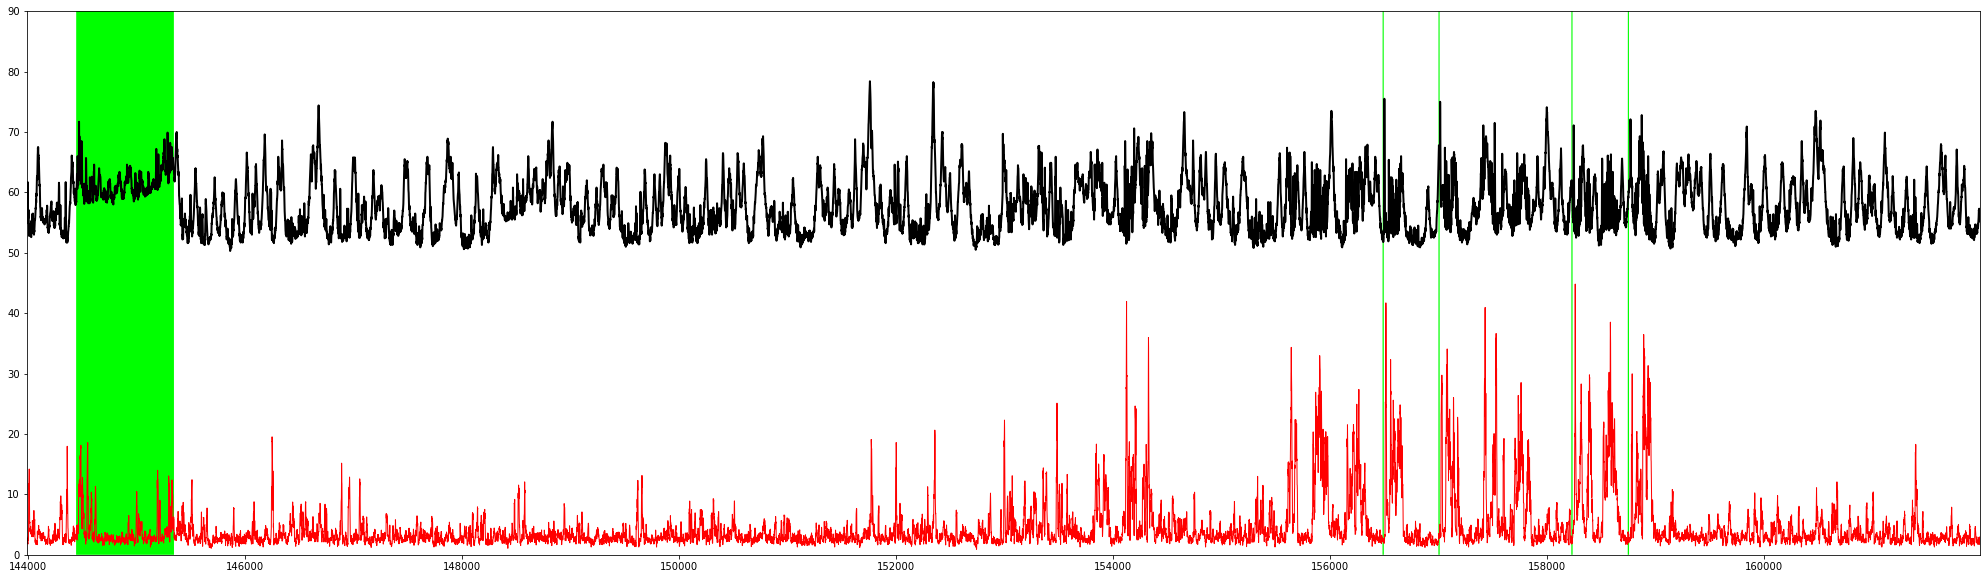

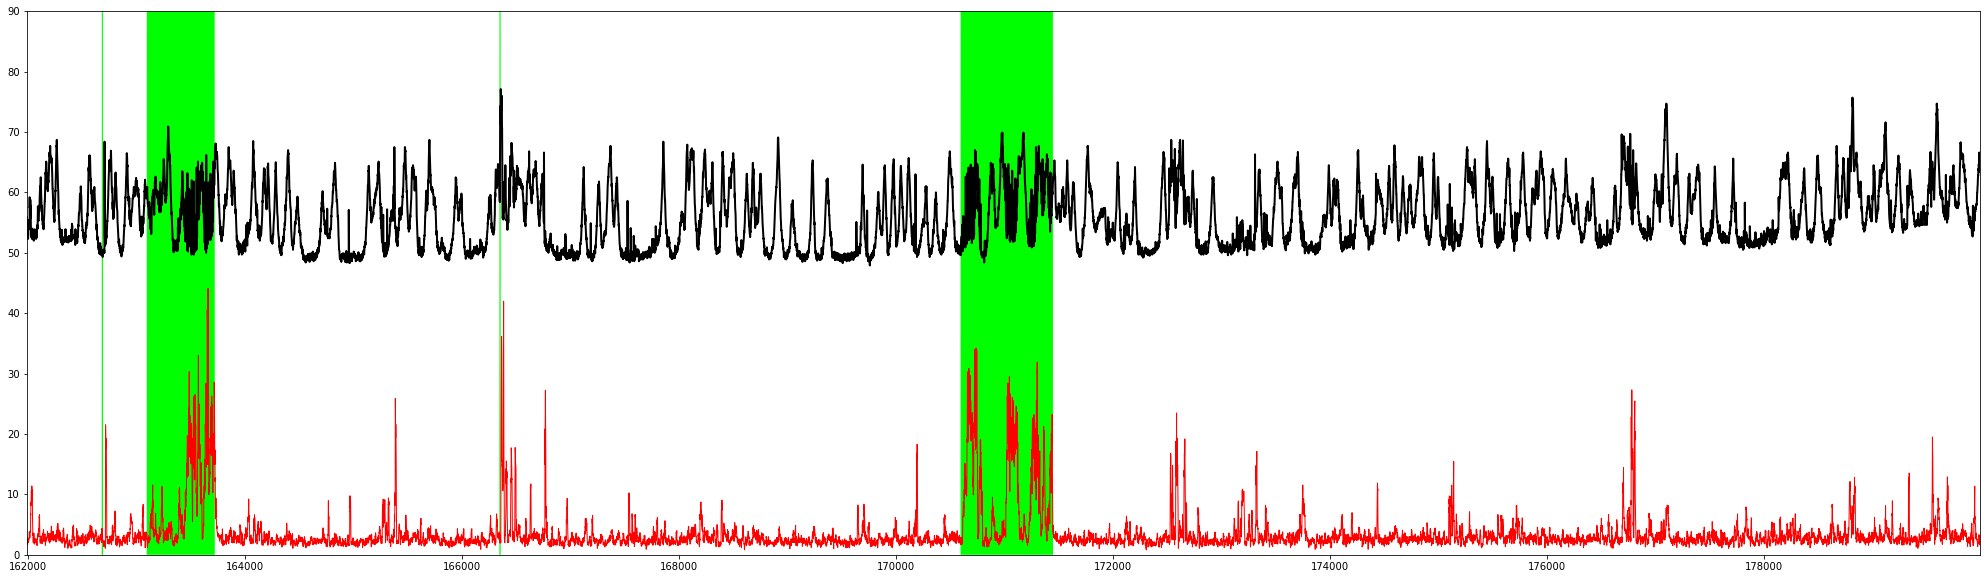

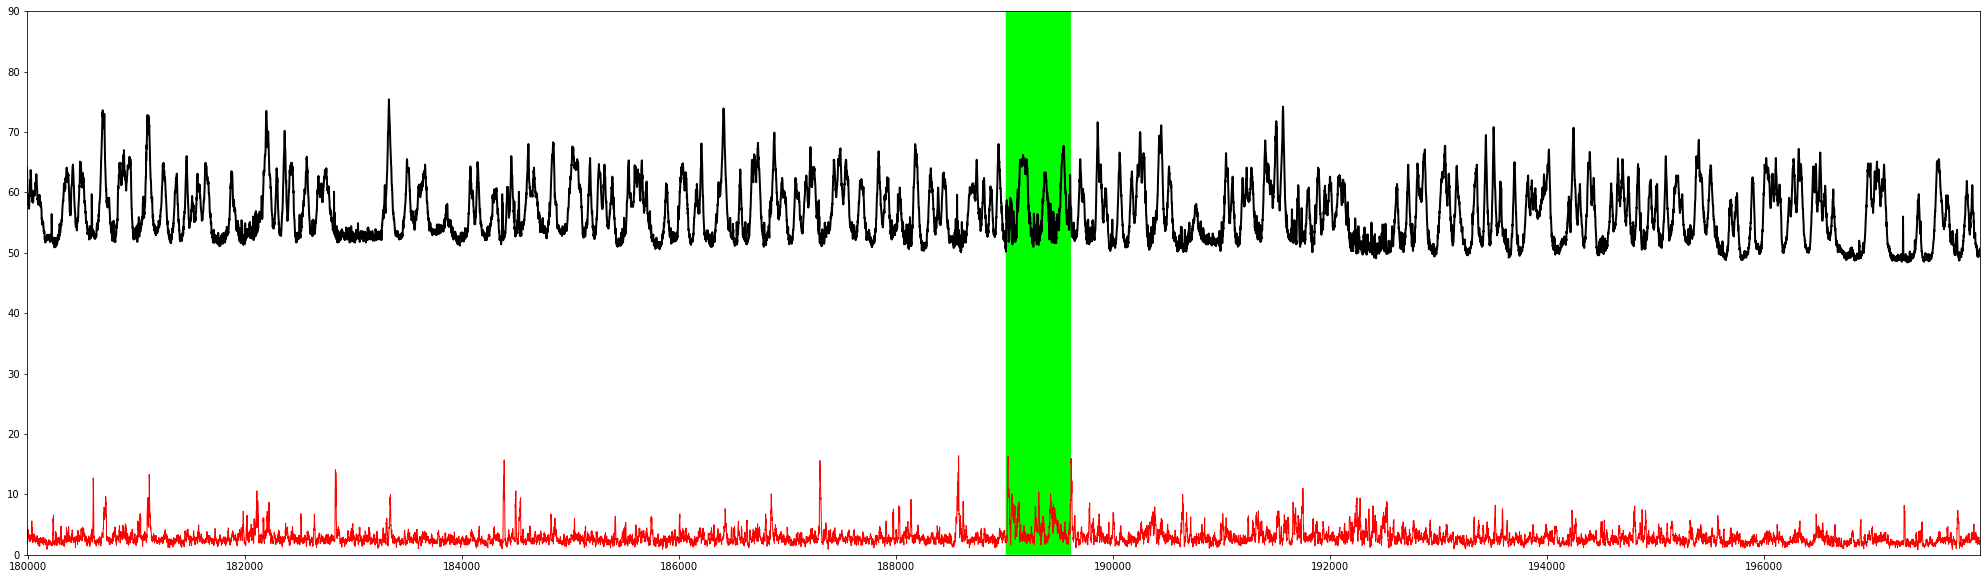

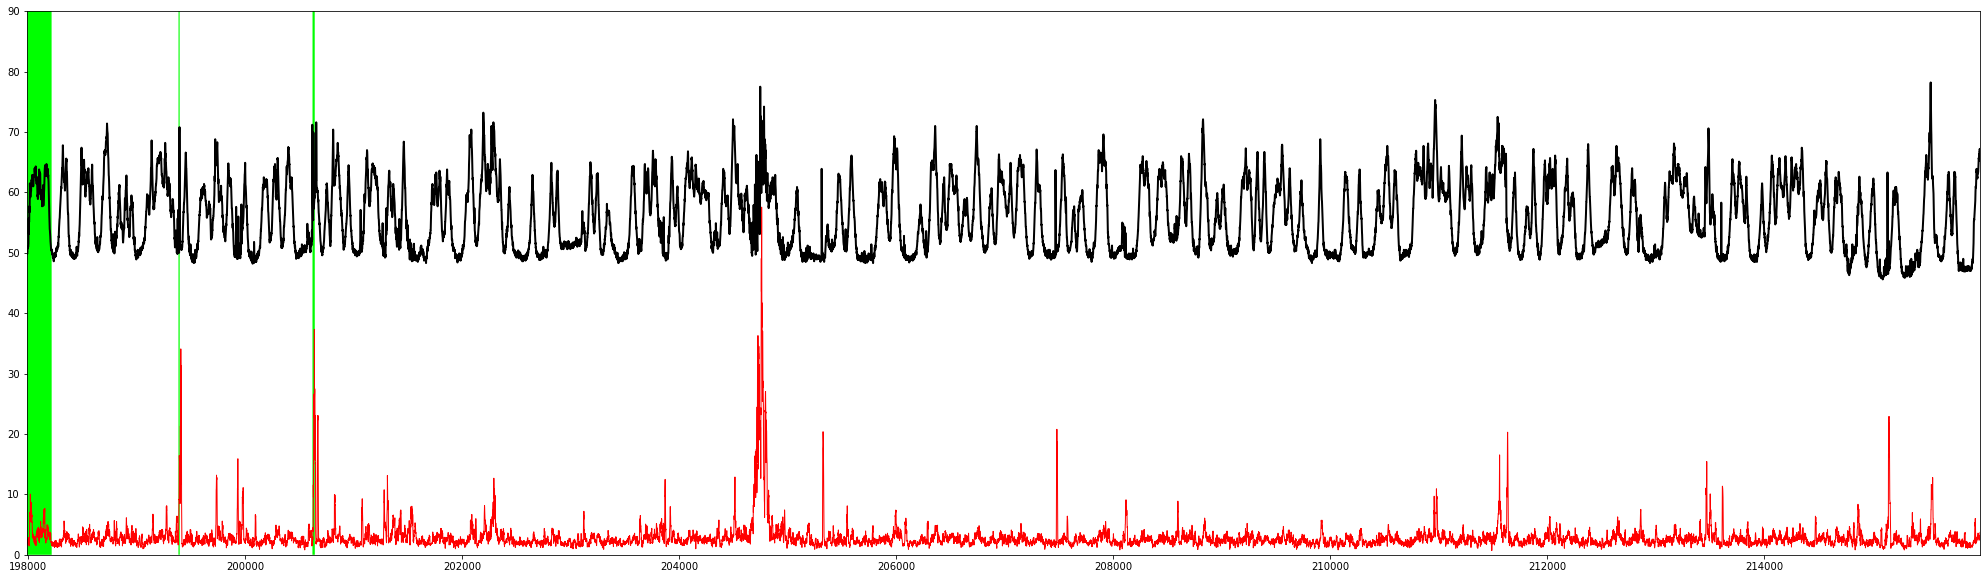

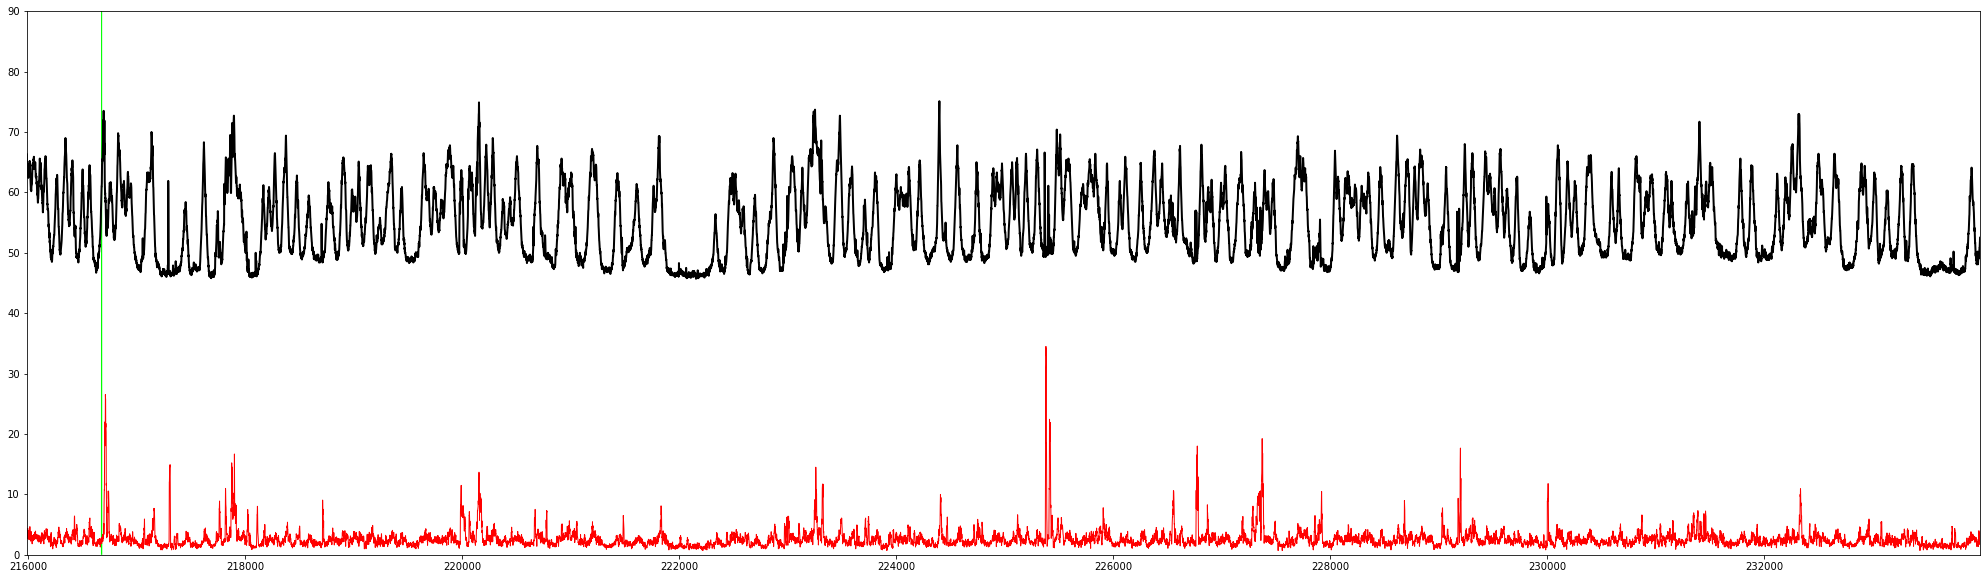

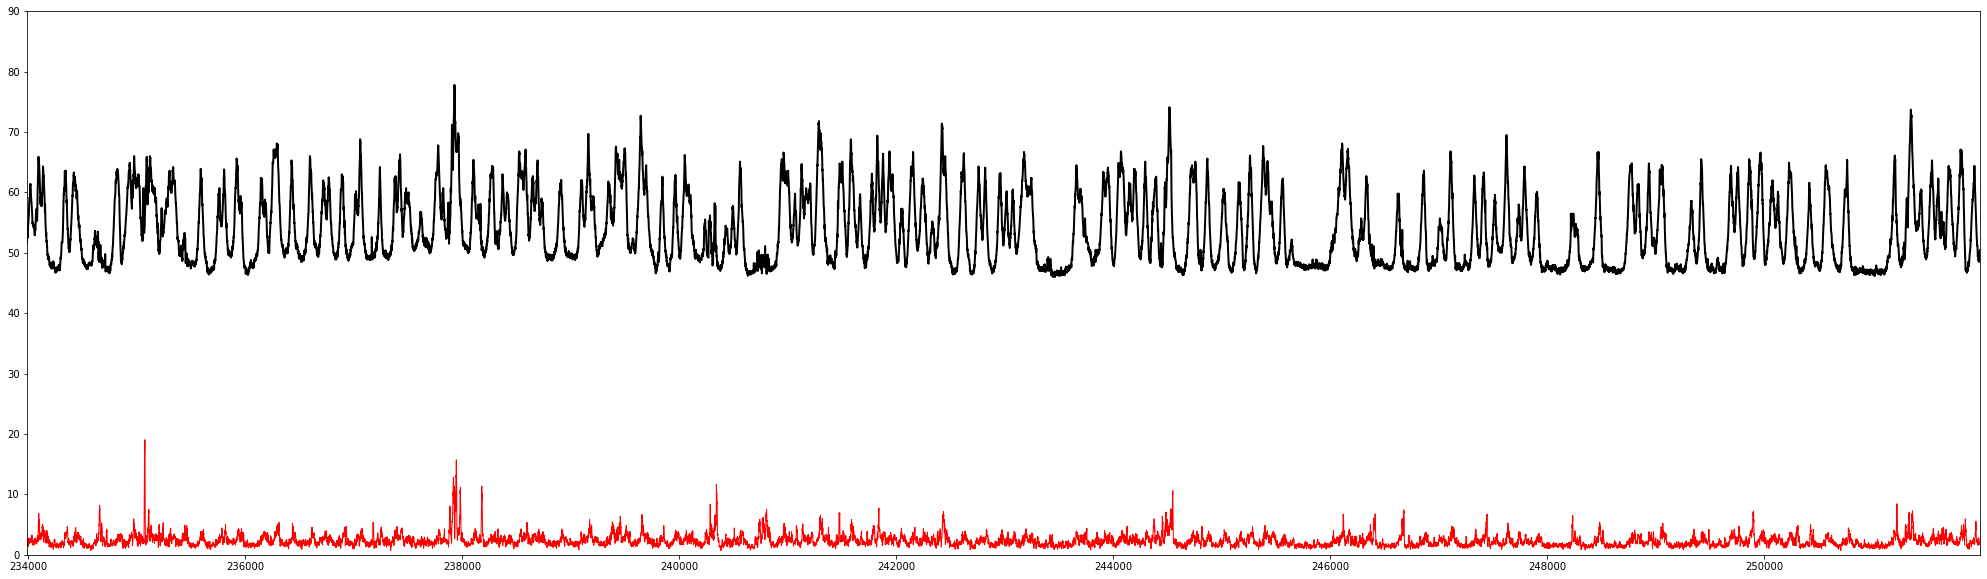

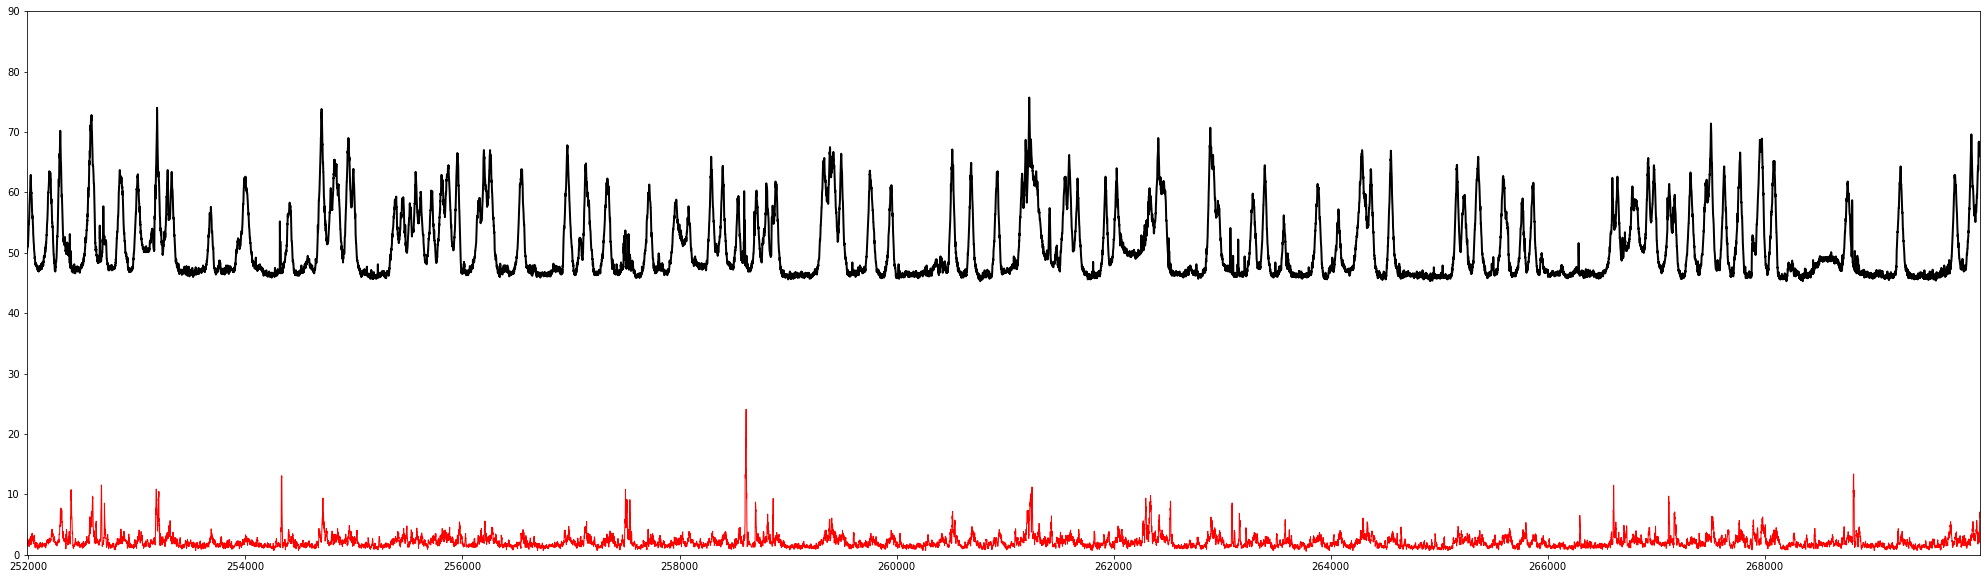

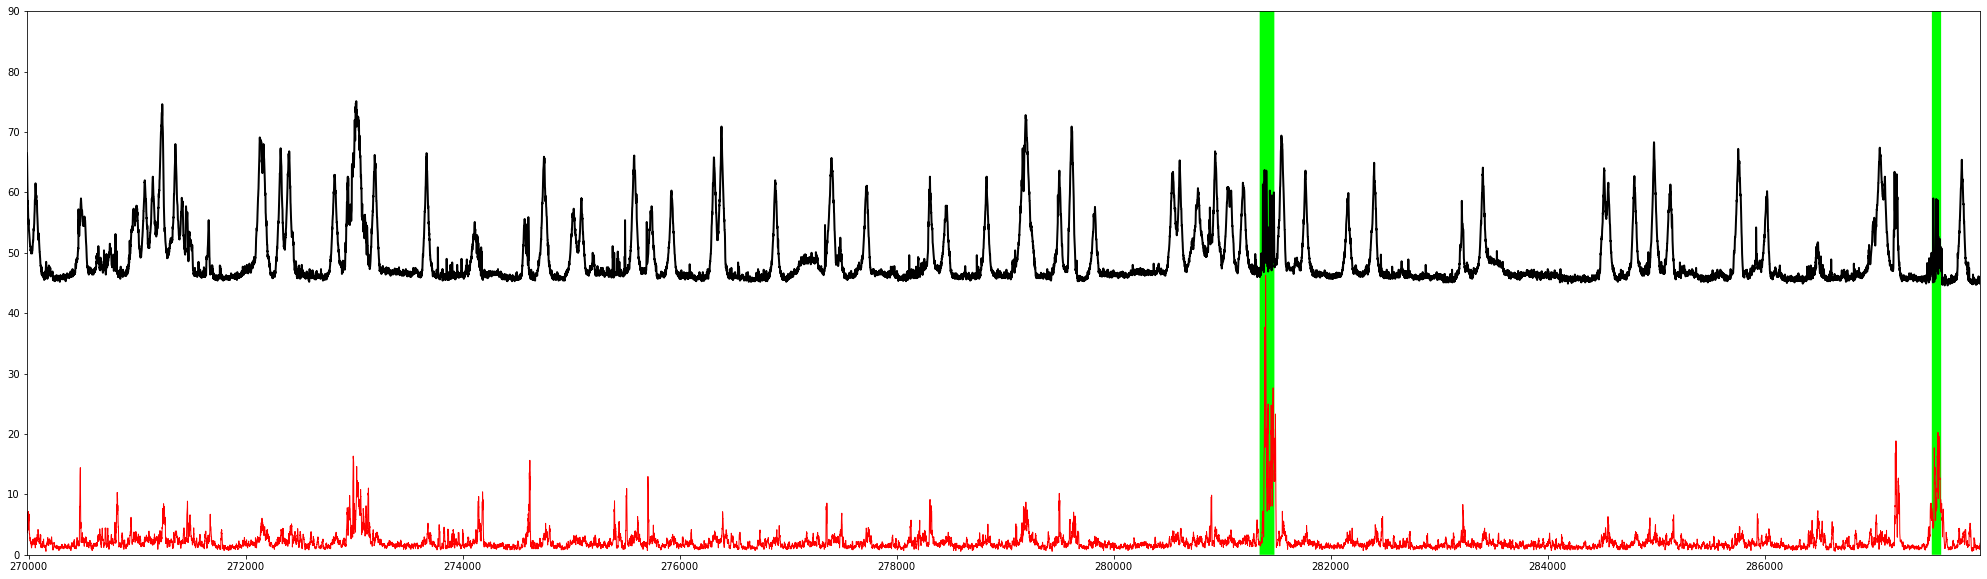

In [38]:
for i in range(16):
    fig = plt.figure(figsize=(35,10))
    ax1 = fig.add_subplot(111)
    # ax2 = ax1.twinx()

    ax1.plot(d*100+0, '-r',linewidth = 1 )
    ax1.plot(test_for_plot, '-k',linewidth = 2)
    ax1.fill_between(label_index, label, facecolor='lime' )
    plt.xlim(i*17999,17999*(i+1))
    plt.ylim(0, 90)
    plt.show()